In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import WeekdayLocator
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import datetime
%matplotlib inline

In [2]:
big_smog = pd.read_csv('./SMOG1.csv', sep = ';')
big_smog.columns=['CZAS', 'Bochnia', 'Brzeszcze', 'Gorlice', 'Krakow-Kurdwanow', 'Krakow-Piastow',
                  'Krakow-Wadow', 'Krakow-Telimeny', 'Krakow-Zloty Rog', 'Muszyna', 'Niepolomice',
                  'Nowa Huta', 'Nowy Sacz', 'Nowy Targ', 'Rabka-Zdroj', 'Tarnow',  'Trzebinia',
                  'Tuchow', 'Zakopane']
big_smog.replace(to_replace = '-', value = 0, inplace = True)
big_smog = big_smog[big_smog.columns].astype(int)
big_smog.head()

,CZAS,Bochnia,Brzeszcze,Gorlice,Krakow-Kurdwanow,Krakow-Piastow,Krakow-Wadow,Krakow-Telimeny,Krakow-Zloty Rog,Muszyna,Niepolomice,Nowa Huta,Nowy Sacz,Nowy Targ,Rabka-Zdroj,Tarnow,Trzebinia,Tuchow,Zakopane
0,1,27,0,20,15,18,0,0,22,0,22,23,22,0,0,19,25,27,26
1,2,27,0,22,35,43,0,0,48,0,36,47,36,0,0,25,43,25,39
2,3,31,0,31,34,38,0,0,44,0,34,39,38,0,0,29,38,34,55
3,4,53,0,55,58,55,0,0,62,0,51,49,63,0,0,0,69,66,36
4,5,35,0,38,47,56,0,0,59,0,43,70,34,0,0,0,46,43,19


In [3]:
big_smog.dtypes

CZAS                int64
Bochnia             int64
Brzeszcze           int64
Gorlice             int64
Krakow-Kurdwanow    int64
Krakow-Piastow      int64
Krakow-Wadow        int64
Krakow-Telimeny     int64
Krakow-Zloty Rog    int64
Muszyna             int64
Niepolomice         int64
Nowa Huta           int64
Nowy Sacz           int64
Nowy Targ           int64
Rabka-Zdroj         int64
Tarnow              int64
Trzebinia           int64
Tuchow              int64
Zakopane            int64
dtype: object

In [4]:
big_smog.shape

(365, 19)

In [5]:
small_smog = pd.read_csv('./SMOG2.csv', sep = ';')
small_smog.rename(columns=lambda x: x.strip(), inplace=True)
#small_smog = small_smog[small_smog.columns].apply(lambda x: x.astype(int) if x != '-' else x == np.nan, axis = 1)

small_smog.replace(to_replace = '-', value = 0, inplace = True)
small_smog = small_smog[small_smog.columns].astype(int)
small_smog.head()

,CZAS,Bochnia,Krakow-Kurdwanow,Nowy Sacz,Tarnow,Trzebinia,Zakopane
0,1,25,15,18,18,23,25
1,2,26,0,30,24,39,37
2,3,28,0,31,28,31,51
3,4,45,50,48,16,58,31
4,5,31,41,24,0,39,17


In [6]:
small_smog.dtypes

CZAS                int64
Bochnia             int64
Krakow-Kurdwanow    int64
Nowy Sacz           int64
Tarnow              int64
Trzebinia           int64
Zakopane            int64
dtype: object

In [7]:
small_smog.shape

(365, 7)

In [8]:
df_climate = pd.read_csv('./generatedMeteoData.csv', usecols=[*range(0, 43)])
df_climate['time'] = pd.to_datetime(df_climate['time'].apply(lambda x: x[0:10]))
df_climate.head()

,time,sn_day_avg,sn_day_max,sn_day_min,sm_day_avg,sm_day_max,sm_day_min,sx_day_avg,sx_day_max,sx_day_min,...,rc_day_min,rd_day_avg,rd_day_max,rd_day_min,ri_day_avg,ri_day_max,ri_day_min,rp_day_avg,rp_day_max,rp_day_min
0,2016-03-01,0.95,4.4,0.0,2.65,6.4,0.5,4.33,9.7,1.1,...,0.0,19476.88,26130.0,0.0,0.23,2.9,0.0,2.95,4.3,0.0
1,2016-03-02,0.74,3.9,0.0,1.96,6.5,0.1,3.06,9.7,0.3,...,0.0,1125.67,26130.0,0.0,0.00,0.0,0.0,0.14,3.3,0.0
2,2016-03-03,0.53,2.9,0.0,1.59,4.3,0.2,2.64,5.8,0.6,...,0.0,1329.96,2020.0,0.0,0.01,0.8,0.0,0.54,0.8,0.0
3,2016-03-04,0.45,2.2,0.0,1.27,3.3,0.2,2.09,5.1,0.5,...,0.0,85.58,2020.0,0.0,0.00,0.0,0.0,0.03,0.8,0.0
4,2016-03-05,0.52,2.8,0.0,1.68,4.1,0.1,2.88,6.5,0.4,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0


In [9]:
df_climate.shape

(365, 43)

In [10]:
df_climate.columns

Index(['time', 'sn_day_avg', 'sn_day_max', 'sn_day_min', 'sm_day_avg',
       'sm_day_max', 'sm_day_min', 'sx_day_avg', 'sx_day_max', 'sx_day_min',
       'dn_day_avg', 'dn_day_max', 'dn_day_min', 'dm_day_avg', 'dm_day_max',
       'dm_day_min', 'dx_day_avg', 'dx_day_max', 'dx_day_min', 'ta_day_avg',
       'ta_day_max', 'ta_day_min', 'pa_day_avg', 'pa_day_max', 'pa_day_min',
       'tp_day_avg', 'tp_day_max', 'tp_day_min', 'ua_day_avg', 'ua_day_max',
       'ua_day_min', 'rc_day_avg', 'rc_day_max', 'rc_day_min', 'rd_day_avg',
       'rd_day_max', 'rd_day_min', 'ri_day_avg', 'ri_day_max', 'ri_day_min',
       'rp_day_avg', 'rp_day_max', 'rp_day_min'],
      dtype='object')

In [11]:
df_temp1 = df_climate.loc[:,['time', 'sm_day_avg', 'ta_day_avg', 'rc_day_avg']]
df_temp1.head()

,time,sm_day_avg,ta_day_avg,rc_day_avg
0,2016-03-01,2.65,2.49,4.54
1,2016-03-02,1.96,3.59,0.25
2,2016-03-03,1.59,5.70,0.12
3,2016-03-04,1.27,5.31,0.01
4,2016-03-05,1.68,5.78,0.00


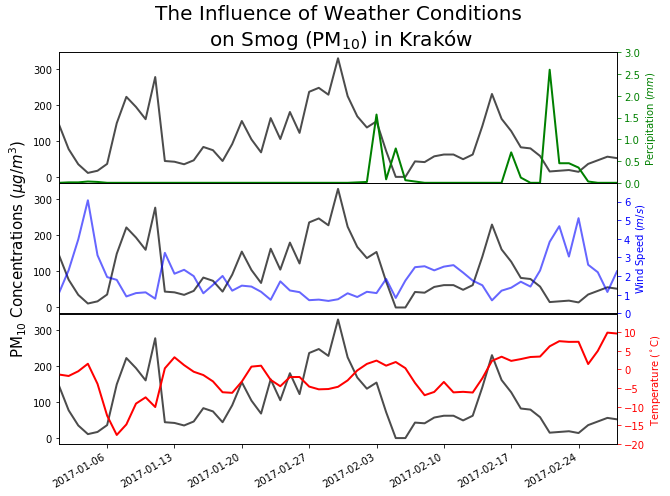

In [12]:
fig, (ax1a, ax2a, ax3a) = plt.subplots(3,1, sharex = True, figsize = (10, 8))
fig.autofmt_xdate()
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.001)

ax1a.plot(df_temp1['time'], big_smog['Krakow-Zloty Rog'], color = 'black', 
          linewidth=2, alpha = 0.7, label = 'rog PM10')
ax1a.set_yticks(np.arange(0, 301, 100))
ax1a.tick_params('y', colors='black')
ax1b = ax1a.twinx()
ax1b.plot(df_temp1['time'], df_temp1['rc_day_avg'], color = 'green', linewidth=2, alpha = 1, label = 'Rain')
ax1b.set_yticks(np.arange(0, 3.1, 0.5))
ax1b.set_ylabel('Percipitation ($mm$)', color='green')
ax1b.tick_params('y', colors='green')
ax1b.set_ylim([0, 3.0])

ax2a.plot(df_temp1['time'], big_smog['Krakow-Zloty Rog'], color = 'black',
          linewidth=2, alpha = 0.7, label = 'rog PM10')
ax2a.set_ylabel('PM$_{10}$ Concentrations ($\mu g/m^3$)', color='black', fontsize=15)
ax2a.set_yticks(np.arange(0, 301, 100))
ax2a.tick_params('y', colors='black')
ax2b = ax2a.twinx()
ax2b.plot(df_temp1['time'], df_temp1['sm_day_avg'], color = 'blue', linewidth=2, alpha = 0.6, label = 'Wind')
ax2b.set_yticks(np.arange(0, 7, 1))
ax2b.set_ylabel('Wind Speed ($m/s$)', color='blue')
ax2b.tick_params('y', colors='blue')
ax2b.set_ylim([0, 7])

ax3a.plot(df_temp1['time'], big_smog['Krakow-Zloty Rog'], color = 'black',
          linewidth=2, alpha = 0.7, label = 'rog PM10')
ax3a.set_yticks(np.arange(0, 301, 100))
ax3a.tick_params('y', colors='black')
ax3b = ax3a.twinx()
ax3b.plot(df_temp1['time'], df_temp1['ta_day_avg'], color = 'red', linewidth=2, alpha = 1, label = 'Temp')
ax3b.set_yticks(np.arange(-20, 15, 5))
ax3b.set_xlabel('days')
ax3b.set_ylabel('Temperature ($^\circ$C)', color='red')
ax3b.tick_params('y', colors='red')
ax3b.set_ylim([-20, 15])

ax3a.set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 2, 28)])
ax1a.set_title('The Influence of Weather Conditions\n on Smog (PM$_{10}$) in Kraków', fontsize=20)

plt.show()